## Algoritmo de Strassen

### Algoritmo de multiplicação padrão


$$ a_1b_1+ a_2b_4+a_3b_7 = c_1 $$


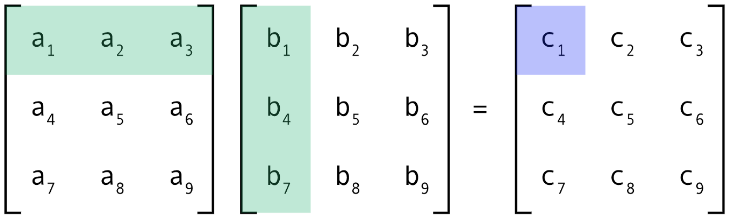

#### Multiplicação com força bruta

$$c_{ij}=∑_{r=1}^na_{ir} b_{rj}$$

O número de operações multiplicativas é de $n^3$

In [ ]:
# número de multiplicações
9*3


27

In [ ]:
import sympy
def brute_force(A, B):
    m, n = A.shape
    n, p = B.shape

    C = sympy.Matrix.zeros(m, p)
    for i in range(m):
        for j in range(p):
            for r in range(n): # linha de B
                C[i,j]+=A[i,r]*B[r,j]
    return C




In [ ]:
A = sympy.randMatrix(4,4, seed=1)
B = sympy.randMatrix(4, 4, seed=1)


In [ ]:
A*B

Matrix([
[8330,  8220, 14732, 11800],
[7137,  7473, 15292,  5026],
[8868, 10560, 19174, 10404],
[4438,  5808,  8610,  4357]])

In [ ]:
brute_force(A, B)

Matrix([
[8330,  8220, 14732, 11800],
[7137,  7473, 15292,  5026],
[8868, 10560, 19174, 10404],
[4438,  5808,  8610,  4357]])

In [ ]:
A[0,0]

17

## Algoritmo de Strassen

O Algoritmo de Strassen multiplica matrizes $A$ e $B$ usando a estratégia de divisão e conquista. A ideia é particionar o problema em produtos de submatrizes e usar recursividade. Vamos considerar $A$ e $B$ matrizes $n\times n$ e, por simplicidade, $n=2^k$ para algum inteiro positivo $k$. Se dividimos $A$ e $B$ em quatro submatrizes de mesma dimensão teremos,


\begin{align*}
C  \qquad&= \qquad A \quad \quad\cdot\qquad  B\\\\
\begin{bmatrix}
C_{11} & C_{12} \\
C_{21} & C_{22}
\end{bmatrix}&= \begin{bmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{bmatrix}\begin{bmatrix}
B_{11} & B_{12} \\
B_{21} & B_{22}
\end{bmatrix}
\end{align*}

e depois calcular

\begin{align}
\begin{split}
    P_1&=\left(A_{11} + A_{22}\right)\left(B_{11}+B_{22}\right)\\
    P_2 &= \left(A_{21} + A_{22}\right)B_{11}  \\
    P_3&= A_{11}\left(B_{12}-B_{22}\right)\\
    P_4&= A_{22}\left(B_{21}-B_{11}\right)\\
    P_5&=\left(A_{11}+A_{12}\right)B_{22}\\
    P_6&=\left(A_{21}-A_{11}\right)\left(B_{11}+B_{12}\right)\\
    P_7&=\left(A_{12}-A_{22}\right)\left(B_{21}+B_{22}\right)
    \end{split}
\end{align}
então pode-se verificar que

\begin{align}
\begin{split}
    C_{11} &= P_1 + P_4-P5+P7  \\
    C_{12} &=P_3+P_5\\
    C_{21} &= P_2+P_4\\
    C_{22} &=P_1+P_3-P_2 + P_6   
\end{split}
\end{align}

### Exemplo 1. Use o algoritmo de Strassen para multiplicar as matrizes
$4 \times 4$.
    \begin{align*}
        A = \begin{bmatrix}
7 & 3 & 5 & 3 \\
2 & 5 & 4 & 6 \\
0 & 0 & 8 & 7 \\
2 & 7 & 8 & 7
\end{bmatrix} \quad \text{e} \quad B = \begin{bmatrix}
5 & 6 & 5 & 3 \\
6 & 3 & 3 & 6 \\
4 & 7 & 7 & 5 \\
0 & 4 & 0 & 8
\end{bmatrix}.
\end{align*}


Dividindo $A$ e $B$ em 4 matrizes de tamanho $2 \times 2$:

  \begin{align*}
    A = \left[\begin{array}{rr|rr}
7 & 3 & 5 & 3 \\
2 & 5 & 4 & 6 \\
\hline
 0 & 0 & 8 & 7 \\
2 & 7 & 8 & 7
\end{array}\right], \qquad    B = \left[\begin{array}{rr|rr}
5 & 6 & 5 & 3 \\
6 & 3 & 3 & 6 \\
\hline
 4 & 7 & 7 & 5 \\
0 & 4 & 0 & 8
\end{array}\right]
\end{align*}

As submatrizes de $A$:

\begin{align}
      A_{11} = \begin{bmatrix}
     7 & 3 \\
                2 & 5
    \end{bmatrix}, \quad A_{12}=\begin{bmatrix}
        5 & 3 \\
        4 & 6
    \end{bmatrix}
    \quad A_{21}=\begin{bmatrix}
        0 & 0 \\
        2 & 7
    \end{bmatrix}
    \quad A_{22}=\begin{bmatrix}
        8 & 7 \\
        8 & 7
    \end{bmatrix}
\end{align}

As submatrizes de $B$:

\begin{align}
      B_{11} = \begin{bmatrix}
     5 & 6 \\
                6 & 3
    \end{bmatrix}, \quad B_{12}=\begin{bmatrix}
        5 & 3 \\
        4 & 6
    \end{bmatrix}
    \quad B_{21}=\begin{bmatrix}
        4 & 7 \\
        0 & 4
    \end{bmatrix}
    \quad B_{22}=\begin{bmatrix}
        7 & 5 \\
        0 & 8
    \end{bmatrix}
\end{align}
Fórmulas de Strassen

\begin{align*}
    P_1 &= \left( \begin{bmatrix}
     7 & 3 \\
                2 & 5
    \end{bmatrix} + \begin{bmatrix}
        5 & 3 \\
        4 & 6
    \end{bmatrix} \right)\left(\begin{bmatrix}
     5 & 6 \\
                6 & 3
    \end{bmatrix}+\begin{bmatrix}
        5 & 3 \\
        4 & 6
    \end{bmatrix}\right)=\begin{bmatrix}
        240 & 225 \\
208 & 198
    \end{bmatrix}\\
    P_2 &= \left(\begin{bmatrix}
        5 & 3 \\
        4 & 6
    \end{bmatrix}+ \begin{bmatrix}
        8 & 7 \\
        8 & 7
    \end{bmatrix}\right)\begin{bmatrix}
     5 & 6 \\
                6 & 3
    \end{bmatrix}=\begin{bmatrix}
        82 & 69 \\
134 & 102
    \end{bmatrix} \\
    P_3 &=  \begin{bmatrix}
     7 & 3 \\
                2 & 5
    \end{bmatrix}\left(\begin{bmatrix}
        5 & 3 \\
        4 & 6
    \end{bmatrix}-\begin{bmatrix}
        7 & 5 \\
        0 & 8
    \end{bmatrix}\right)= \begin{bmatrix}
        -5 & -20 \\
11 & -14
    \end{bmatrix}  \\
    P_4 &= \begin{bmatrix}
        8 & 7 \\
        8 & 7
    \end{bmatrix}\left(\begin{bmatrix}
        4 & 7 \\
        0 & 4
    \end{bmatrix}-\begin{bmatrix}
     5 & 6 \\
                6 & 3
    \end{bmatrix}\right)=\begin{bmatrix}
        -50 & 15 \\
-50 & 15
    \end{bmatrix} \\
    P_5 &= \left( \begin{bmatrix}
     7 & 3 \\
                2 & 5
    \end{bmatrix} +\begin{bmatrix}
        5 & 3 \\
        4 & 6
    \end{bmatrix}\right)\begin{bmatrix}
        7 & 5 \\
        0 & 8
    \end{bmatrix}=\begin{bmatrix}
        84 & 108 \\
42 & 118
    \end{bmatrix} \\
    P_6 &= \left(\begin{bmatrix}
        0 & 0 \\
        2 & 7
    \end{bmatrix}-\begin{bmatrix}
     7 & 3 \\
                2 & 5
    \end{bmatrix}\right)\left(\begin{bmatrix}
     5 & 6 \\
                6 & 3
    \end{bmatrix}+\begin{bmatrix}
        5 & 3 \\
        4 & 6
    \end{bmatrix}\right)=\begin{bmatrix}
        -97 & -90 \\
18 & 18
    \end{bmatrix} \\
    P_7&=\left(\begin{bmatrix}
        5 & 3 \\
        4 & 6
    \end{bmatrix}-\begin{bmatrix}
        8 & 7 \\
        8 & 7
    \end{bmatrix}\right)\left(\begin{bmatrix}
        4 & 7 \\
        0 & 4
    \end{bmatrix}
    +\begin{bmatrix}
        7 & 5 \\
        0 & 8
    \end{bmatrix}\right)=\begin{bmatrix}
        -33 & -84 \\
-44 & -60
    \end{bmatrix}
\end{align*}
Assim,
\begin{align*}
    C_{11}=\begin{bmatrix}
        73 & 98 \\
56 & 79
    \end{bmatrix},\quad C_{12}=\begin{bmatrix}
        79 & 88 \\
53 & 104
    \end{bmatrix},
    \quad C_{21}= \begin{bmatrix}
        32 & 84 \\
84 & 117
    \end{bmatrix},\quad C_{22}=\begin{bmatrix}
       56 & 96 \\
87 & 144
    \end{bmatrix}.    
\end{align*}
\begin{align*}
C = A \times B =    \left[\begin{array}{rr|rr}
73 & 98 & 79 & 88 \\
56 & 79 & 53 & 104 \\
\hline
 32 & 84 & 56 & 96 \\
84 & 117 & 87 & 144
\end{array}\right].
\end{align*}



Número de multiplicações:

- **Algoritmo padrão:** $4^3=64$.
- **Algoritmo de Strassen:**
 A multiplicação de  matrizes $2 \times 2$ requer 8 operações multiplicativas. Já que temos 7 multiplicações deste tipo, temos $7\cdot 8=42$ operações.

### Implementação

####Como obter submatrizes?

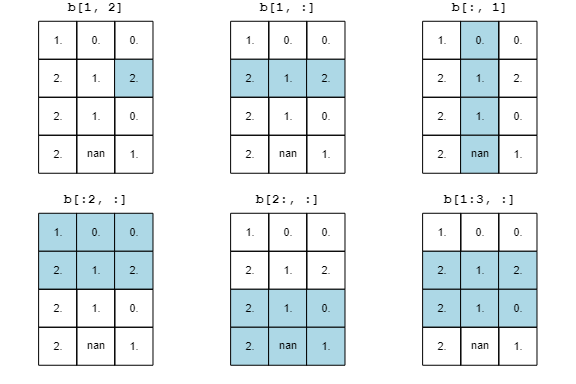



In [ ]:
import sympy
def blocos_submatrizes(A):
    """
    :entrada: matriz A:
    :retorna: Submatrizes N/2 x N/2 de A -> A00, A12, A21, A22
    """
    linha, coluna = A.shape
    l2 = linha//2
    c2 = coluna//2
    return A[:l2, :c2], A[:l2, c2:], A[l2:, :c2], A[l2:, c2:]

In [ ]:
def strassen(A, B):
    if len(A) == 4: # matriz 2 x 2
        return A*B
    A11, A12, A21, A22 = blocos_submatrizes(A)
    B11, B12, B21, B22 = blocos_submatrizes(B)

    P1 = strassen(A11 + A22, B11 + B22)
    P2 = strassen(A21 + A22, B11)
    P3 = strassen(A11, B12 - B22)
    P4 = strassen(A22, B21 - B11)
    P5 = strassen(A11 + A12, B22)
    P6 = strassen(A21 - A11, B11 + B12)
    P7 = strassen(A12 - A22, B21 + B22)
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 + P3 - P2 + P6

    C = sympy.Matrix(sympy.BlockMatrix([[C11, C12], [C21, C22]]))

    return C
